In [1402]:
import pandas as pd

In [1403]:
df=pd.read_csv(r'C:\Users\Lenovo\ETEA Historical Data.csv')
#df=pd.read_csv(r'C:\Users\Lenovo\Nifty 50 Historical Data.csv')

1. For finding out liquidity we need HIGH and LOW
2. For an avg support and resistance we can use OPEN

In [1404]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
933,30-07-2021,133.50,142.60,142.70,131.00,88.31M,-5.69%
934,29-07-2021,141.55,134.95,144.00,132.20,117.97M,7.89%
935,28-07-2021,131.20,131.00,135.00,123.55,159.79M,-1.28%
936,27-07-2021,132.90,141.70,147.80,127.75,240.34M,-5.51%
937,26-07-2021,140.65,126.35,143.75,125.30,249.72M,11.63%


In [1405]:
df=df[::-1]
df=df.reset_index()

In [1406]:
df.drop(['index'],axis=1,inplace=True)

In [1407]:
df.head(1)

,Date,Price,Open,High,Low,Vol.,Change %
0,26-07-2021,140.65,126.35,143.75,125.3,249.72M,11.63%


In [1408]:
df['Vol.']=df['Vol.'].fillna('0.00M')

In [1409]:
# df['Price']=pd.DataFrame(df['Price'].str.slice(stop=-3).str.replace(',','').astype(int))
# df['Open']=pd.DataFrame(df['Open'].str.slice(stop=-3).str.replace(',','').astype(int))
# df['High']=pd.DataFrame(df['High'].str.slice(stop=-3).str.replace(',','').astype(int))
# df['Low']=pd.DataFrame(df['Low'].str.slice(stop=-3).str.replace(',','').astype(int))
df['Vol.']=pd.DataFrame(df['Vol.'].str.slice(stop=-4).astype(int))

In [1410]:
import matplotlib.pyplot as plt

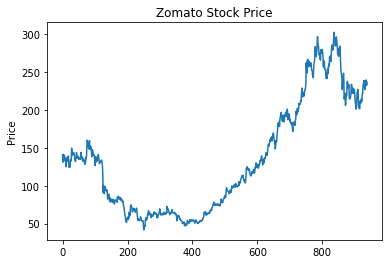

In [1578]:
plt.plot(df.index[:],df['Price'][:])
plt.title("Zomato Stock Price")
plt.ylabel("Price")
plt.show()

##  As closest support and resistance matter more, so we will take data for last 90 days

In [1413]:
df1=df[len(df)-90:]
df1=df1.reset_index()
df1.drop(['index'],axis=1,inplace=True)

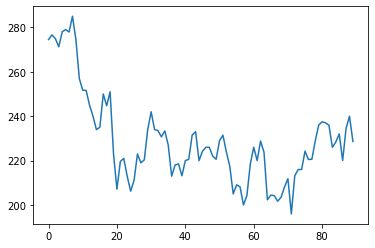

In [1414]:
plt.plot(df1.index,df1['Open'])

## Present Price have great impact of finding S and R

In [1415]:
xFactor=df1['Price'][len(df1)-1]
xFactor

236.9

## Now DSA ALGO, to find Support & Resistance

SUPPORT

In [1496]:
# Converting High and Low into a list
High=list(df1['High'])
Low=list(df1['Low'])

for i in range(len(High)):
    High[i]=int(High[i])
    Low[i]=int(Low[i])

In [1502]:
#Traverse leftside means reverse direction and get frequency
frequency={}
stack=[]

In [1503]:
for i in range(len(Low)-1,-1,-1):
    if xFactor>Low[i]:   #MAY BE A SUPPORT
        
        if Low[i] in stack: # is low already in frequency
            frequency[Low[i]]+=1
        elif Low[i]-1 in stack: # is low already in frequency
            frequency[Low[i]-1]+=1
        else:
            if not stack: #when stack is empty
                stack.append(Low[i])
                frequency[Low[i]]=1
            else:
                l=stack.pop()
                if Low[i]<xFactor and 1.009*l>=Low[i]    and   0.991*l<=Low[i]: #if low is within stack tops +- 0.9%, then prev low was considered
                    stack.append(l) #PREV. LOW WAS LOWER
                    frequency[l]+=1
                else:
                    stack.append(l)
                    stack.append(Low[i]) #NEW LOW
                    
                    #Even though stack gets append with new low,,,, still frequency has its own rule to change
                    #A range of +-1 is consided, let new low 202, check 201 and 203 already present as low or not, if present than increment that specific value
                    if Low[i] not in frequency or Low[i]+1 not in frequency or Low[i]-1 not in frequency:
                        frequency[Low[i]]=1 #new low in frequency
                    else:
                        if Low[i] in frequency:
                            frequency[Low[i]]+=1
                        elif Low[i]+1 in frequency:
                            frequency[Low[i]+1]+=1
                        elif Low[i]-1 in frequency:
                            frequency[Low[i]-1]+=1

In [1504]:
#Low[::-1]
#stack
freqSupport=frequency.copy()

In [1419]:
#FINDING 3 Supports
lowest1=0
freqLowest1=-10**9+7
lowest2=0
freqLowest2=-10**9+7
lowest3=0
freqLowest3=-10**9+7
for val,freq in frequency.items():
    if freqLowest1<freq:
        freqLowest1=freq
        lowest1=val
frequency[lowest1]=0
for val,freq in frequency.items():
    if freqLowest2<freq and (val>1.02*lowest1 or val<0.98*lowest1): #should not be very close to previous support
        freqLowest2=freq
        lowest2=val
frequency[lowest2]=0
for val,freq in frequency.items():
    if freqLowest3<freq and (val>1.02*lowest1 or val<0.98*lowest1) and (val>1.02*lowest2 or val<0.98*lowest2):
        freqLowest3=freq
        lowest3=val
frequency[lowest3]=0

In [1420]:
lowest_Freq=[[lowest1,freqLowest1],[lowest2,freqLowest2],[lowest3,freqLowest3]]
lowest_Freq=sorted(lowest_Freq,reverse=True)

In [1421]:
lowest_Freq

[[226, 7], [216, 7], [209, 6]]

In [1422]:
lowest1=lowest_Freq[0][0]
freqLowest1=lowest_Freq[0][1]
lowest2=lowest_Freq[1][0]
freqLowest2=lowest_Freq[1][1]
lowest3=lowest_Freq[2][0]
freqLowest3=lowest_Freq[2][1]

In [1423]:
print(lowest1,freqLowest1)
print(lowest2,freqLowest2)
print(lowest3,freqLowest3)

226 7
216 7
209 6


In [1425]:
support1=[lowest1 for _ in range(90)]
support2=[lowest2 for _ in range(90)]
support3=[lowest3 for _ in range(90)]

In [1426]:
df1['Open']

0     274.50
1     276.60
2     274.90
3     271.25
4     278.00
       ...  
85    232.00
86    220.05
87    234.50
88    240.00
89    228.60
Name: Open, Length: 90, dtype: float64

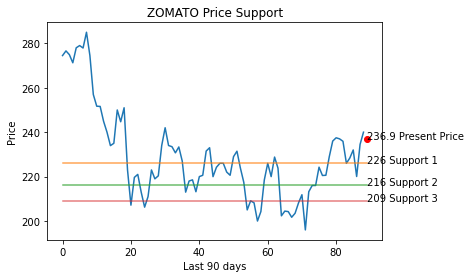

In [1427]:
plt.plot(df1.index[:-1],df1['Open'][:-1])
plt.scatter(df1.index[-1],df1['Price'][len(df1['Price'])-1],color='Red')
plt.text(df1.index[-1],df1['Price'][len(df1['Price'])-1],str(xFactor)+' '+'Present Price')

plt.plot(df1.index,support1,alpha=0.1*freqLowest1)
plt.text(df1.index[-1],lowest1,str(lowest1)+' '+'Support 1')
plt.plot(df1.index,support2,alpha=0.1*freqLowest2)
plt.text(df1.index[-1],lowest2,str(lowest2)+' '+'Support 2')
plt.plot(df1.index,support3,alpha=0.1*freqLowest3)
plt.text(df1.index[-1],lowest3,str(lowest3)+' '+'Support 3')
plt.title("ZOMATO Price Support")
plt.xlabel("Last 90 days")
plt.ylabel('Price')
plt.show()

RESISTANCE

In [1428]:
#Traverse leftside means reverse direction and get frequency
frequency={}
stack=[]

In [1429]:
for i in range(len(High)-1,-1,-1):
    if xFactor<High[i]:   #MAY BE A Resistance
        
        if High[i] in stack: # is high already in frequency
            frequency[High[i]]+=1
        elif High[i]+1 in stack: # is high already in frequency
            frequency[High[i]+1]+=1
        else:
            if not stack: #when stack is empty
                stack.append(High[i])
                frequency[High[i]]=1
            else:
                l=stack.pop()
                if High[i]<xFactor and 1.01*l>=High[i]    and   0.9*l<=High[i]: #if High is within stack tops +- 0.9%, then prev High was considered
                    stack.append(l) #PREV. High was Higher
                    frequency[l]+=1
                else:
                    stack.append(l)
                    stack.append(High[i]) #NEW HIGH
                    
                    #Even though stack gets append with new high,,,, still frequency has its own rule to change
                    #A range of +-1 is consided, let new high 202, check 201 and 203 already present as high or not, if present than increment that specific value
                    if High[i] not in frequency or High[i]+1 not in frequency or High[i]-1 not in frequency:
                        frequency[High[i]]=1 #new low in frequency
                    else:
                        if High[i] in frequency:
                            frequency[High[i]]+=1
                        elif High[i]+1 in frequency:
                            frequency[High[i]+1]+=1
                        elif High[i]-1 in frequency:
                            frequency[High[i]-1]+=1

In [1430]:
# frequency

In [1431]:
#FINDING 3 Supports
Highest1=0
freqHighest1=-10**9+7
Highest2=0
freqHighest2=-10**9+7
Highest3=0
freqHighest3=-10**9+7
for val,freq in frequency.items():
    if freqHighest1<freq:
        freqHighest1=freq
        Highest1=val
frequency[Highest1]=0
for val,freq in frequency.items():
    if freqHighest2<freq and (val>1.02*Highest1 or val<0.98*Highest1):
        freqHighest2=freq
        Highest2=val
frequency[Highest2]=0
for val,freq in frequency.items():
    if freqHighest3<freq and (val>1.02*Highest1 or val<0.98*Highest1) and (val>1.02*Highest2 or val<0.98*Highest2):
        freqHighest3=freq
        Highest3=val
frequency[Highest3]=0

In [1432]:
highest_Freq=[[Highest1,freqHighest1],[Highest2,freqHighest2],[Highest3,freqHighest3]]
highest_Freq=sorted(highest_Freq)

In [1433]:
highest_Freq

[[241, 7], [246, 2], [252, 2]]

In [1434]:
highest1=highest_Freq[0][0]
freqhighest1=highest_Freq[0][1]
highest2=highest_Freq[1][0]
freqhighest2=highest_Freq[1][1]
highest3=highest_Freq[2][0]
freqhighest3=highest_Freq[2][1]

In [1435]:
resistance1=[Highest1 for _ in range(90)]
resistance2=[Highest2 for _ in range(90)]
resistance3=[Highest3 for _ in range(90)]

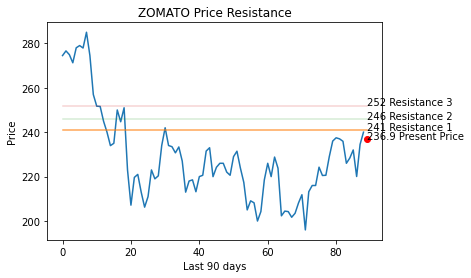

In [1436]:
plt.plot(df1.index[:-1],df1['Open'][:-1])
plt.scatter(df1.index[-1],df1['Price'][len(df1['Price'])-1],color='Red')
plt.text(df1.index[-1],df1['Price'][len(df1['Price'])-1],str(xFactor)+' '+'Present Price')
plt.plot(df1.index,resistance1,alpha=0.1*freqhighest1)
plt.text(df1.index[-1],Highest1,str(Highest1)+' '+'Resistance 1')
plt.plot(df1.index,resistance2,alpha=0.1*freqhighest2)
plt.text(df1.index[-1],Highest2,str(Highest2)+' '+'Resistance 2')
plt.plot(df1.index,resistance3,alpha=0.1*freqhighest3)
plt.text(df1.index[-1],Highest3,str(Highest3)+' '+'Resistance 3')
plt.title("ZOMATO Price Resistance")
plt.xlabel("Last 90 days")
plt.ylabel('Price')
plt.show()

## Bear, Bull, Consolidate

For it we have to consider longer span, let it be 380 days

In [1437]:
df2=df[['Price','Change %','Vol.']][len(df)-380:].copy()
df2=df2.reset_index()
df2.drop(['index'],axis=1,inplace=True)


In [1438]:
df2['Change']=df2['Change %'].str.slice(stop=-1).astype('float')

In [1439]:
df2

,Price,Change %,Vol.,Change
0,108.25,-0.60%,59,-0.60
1,106.45,-1.66%,108,-1.66
2,105.65,-0.75%,43,-0.75
3,107.70,1.94%,48,1.94
4,105.10,-2.41%,49,-2.41
...,...,...,...,...
375,232.52,0.61%,45,0.61
376,234.29,0.76%,104,0.76
377,239.90,2.39%,37,2.39
378,232.64,-3.03%,25,-3.03


As we know 20 day moving avg is very important to identify current trend

So we will use sliding window of 20

In [1466]:
x=[]
y=[]

for i in range(20):
    x.append(df2["Price"][i])
    y.append(df2['Change'][i])

In [1467]:
change=x[len(x)-1]-x[0]
change

8.25

In [1468]:
import numpy as np

In [1469]:
window=[]
trend=[]
tag=[]
volatility=[]
vwindow=[]
for i in range(len(df2)):
    #LOGIC 1
    window.append(df2['Change'][i])
    vwindow.append(df2['Vol.'][i])
    if len(window)==20:
        trend.append(np.sum(window)/20)
        volatility.append(vwindow)
        if trend[-1]<-0.18:
            tag.append('Bear')
        elif trend[-1]>0.2:
            tag.append('Bull')
        else:
            tag.append("Consolidate")
        window=[]
        vwindow=[]
    ##########################
    #LOGIC 2
#     window.append(df2['Price'][i])
#     vwindow.append(df2['Vol.'][i])
#     if len(window)==20:
#         trend.append(window[-1])#-window[0])
#         #print(window[-1],window[0])
#         volatility.append(vwindow)
#         if trend[-1]<0.95*window[0]:
#             tag.append('Bear')
#         elif trend[-1]>1.05*window[0]:
#             tag.append('Bull')
#         else:
#             tag.append("Consolidate")
#         window=[]
#         vwindow=[]

In [1470]:
x=0
for i,t in zip(trend,tag):
    print(x,i,t)
    x+=20

0 0.3794999999999999 Bull
20 0.364 Bull
40 0.21000000000000002 Bull
60 0.9810000000000002 Bull
80 0.13400000000000012 Consolidate
100 0.7585 Bull
120 0.27599999999999997 Bull
140 -0.20399999999999996 Bear
160 1.057 Bull
180 0.6389999999999999 Bull
200 0.292 Bull
220 0.0995 Consolidate
240 -0.349 Bear
260 0.7569999999999999 Bull
280 -0.756 Bear
300 -0.2015000000000001 Bear
320 -0.19950000000000007 Bear
340 -0.33849999999999997 Bear
360 0.6005 Bull


In [1471]:
#trend
tagCopy=tag.copy()
#tag

In [1472]:
bearx=[]
bullx=[]
consolidatex=[]

beary=[]
bully=[]
consolidatey=[]

In [1473]:
windowCount=0
idx=0
stack1=[]
stack2=[]
empty=[None for _ in range(20)]
for i in df2.Price:
    windowCount+=1
    stack1.append(i)
    stack2.append(idx)
    if windowCount==20:
        t=tag.pop(0)
        if t=='Bear':
            bearx.extend(stack2)
            beary.extend(stack1)
            bullx.extend(empty)
            bully.extend(empty)
            consolidatex.extend(empty)
            consolidatey.extend(empty)
        if t=='Bull':
            bullx.extend(stack2)
            bully.extend(stack1)
            bearx.extend(empty)
            beary.extend(empty)
            consolidatex.extend(empty)
            consolidatey.extend(empty)
        if t=='Consolidate':
            consolidatex.extend(stack2)
            consolidatey.extend(stack1)
            bullx.extend(empty)
            bully.extend(empty)
            bearx.extend(empty)
            beary.extend(empty)
        stack1=[]
        stack2=[]
        windowCount=0
    idx+=1

In [1474]:
# SUPPORT Resistance MODIFICATION
# i=0
# while i!=380-90:
#     support1.insert(0,None)
#     support2.insert(0,None)
#     support3.insert(0,None)
#     resistance1.insert(0,None)
#     resistance2.insert(0,None)
#     resistance3.insert(0,None)
#     i+=1

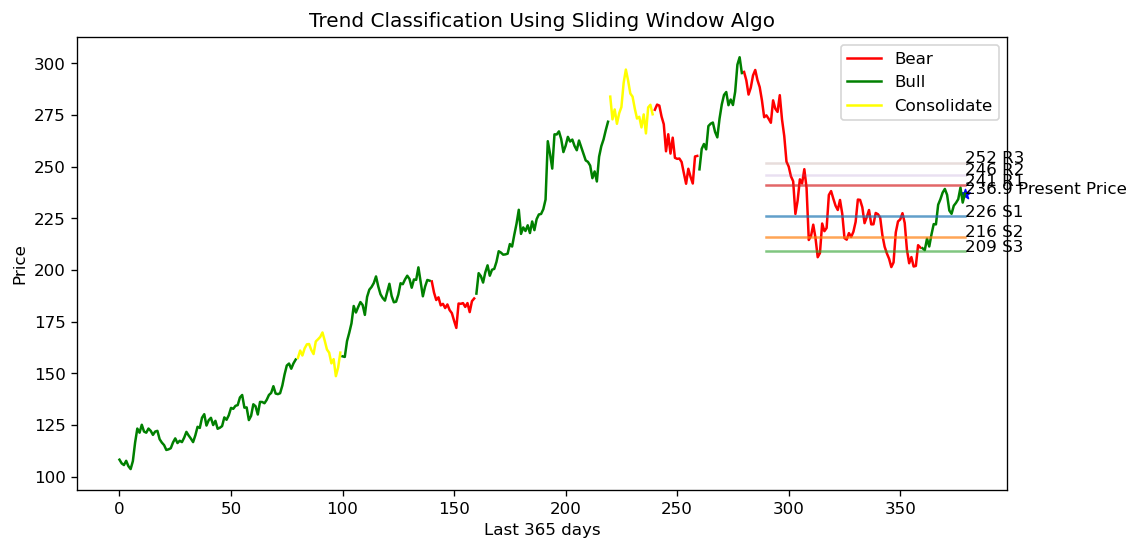

In [1475]:
#plt.plot(df2.index,df2['Price'])
plt.figure(figsize=(10, 5), dpi=120)
plt.plot(bearx,beary,label='Bear',color='red')
plt.plot(bullx,bully,label='Bull',color='Green')
plt.plot(consolidatex,consolidatey,label='Consolidate',color='yellow')

plt.scatter(df2.index[-1],df2['Price'][len(df2['Price'])-1],color='Blue',marker='*')
plt.text(df2.index[-1],df2['Price'][len(df2['Price'])-1],str(xFactor)+' '+'Present Price')

plt.plot(df2.index,support1,alpha=0.1*freqLowest1)
plt.text(df2.index[-1],lowest1,str(lowest1)+' '+'S1')
plt.plot(df2.index,support2,alpha=0.1*freqLowest2)
plt.text(df2.index[-1],lowest2,str(lowest2)+' '+'S2')
plt.plot(df2.index,support3,alpha=0.1*freqLowest3)
plt.text(df2.index[-1],lowest3,str(lowest3)+' '+'S3')


plt.plot(df2.index,resistance1,alpha=0.1*freqhighest1)
plt.text(df2.index[-1],Highest1,str(Highest1)+' '+'R1')
plt.plot(df2.index,resistance2,alpha=0.1*freqhighest2)
plt.text(df2.index[-1],Highest2,str(Highest2)+' '+'R2')
plt.plot(df2.index,resistance3,alpha=0.1*freqhighest3)
plt.text(df2.index[-1],Highest3,str(Highest3)+' '+'R3')



plt.legend()
plt.title('Trend Classification Using Sliding Window Algo')
plt.xlabel("Last 380 days")
plt.ylabel('Price')
plt.show()


In [1476]:
BearVolatile=[]
BullVolatile=[]
ConsolidateVolatile=[]
Nan=[None for _ in range(20)]
for i in range(len(tagCopy)):
    if tagCopy[i]=='Consolidate':
        ConsolidateVolatile.extend(volatility[i])
        BullVolatile.extend(Nan)
        BearVolatile.extend(Nan)
    elif tagCopy[i]=='Bear':
        ConsolidateVolatile.extend(Nan)
        BullVolatile.extend(Nan)
        BearVolatile.extend(volatility[i])
    elif tagCopy[i]=='Bull':
        ConsolidateVolatile.extend(Nan)
        BullVolatile.extend(volatility[i])
        BearVolatile.extend(Nan)

In [1477]:
len(df2.index)

380

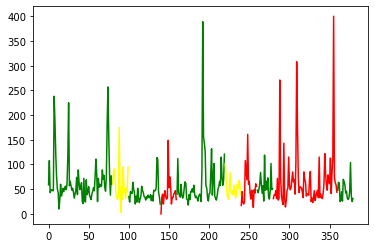

In [1478]:
plt.plot(df2.index,BearVolatile,color='red')
plt.plot(df2.index,BullVolatile,color='green')
plt.plot(df2.index,ConsolidateVolatile,color='yellow')

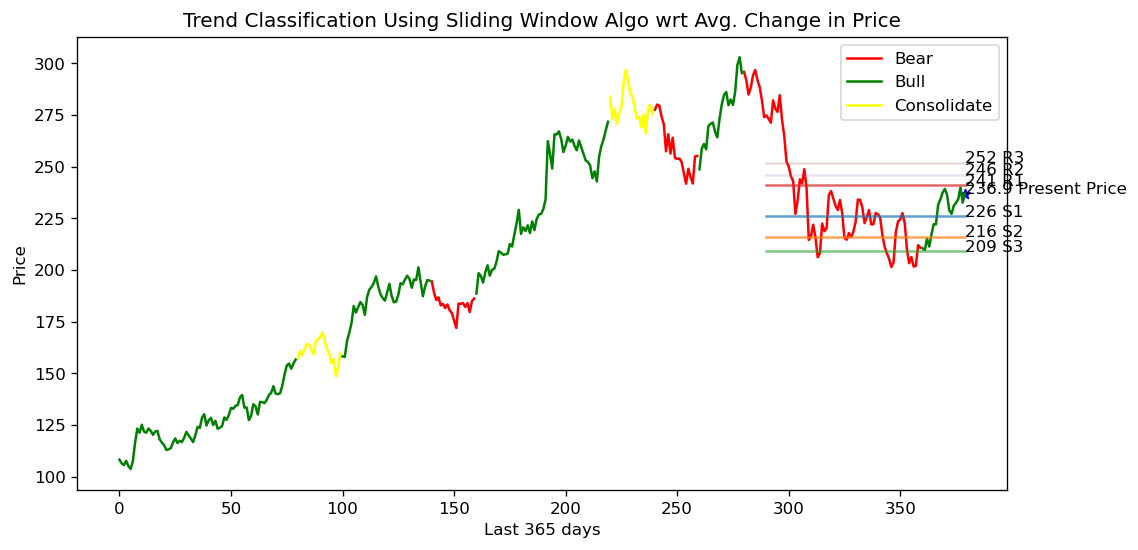

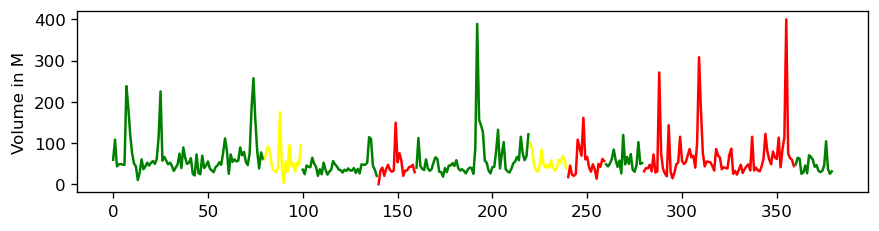

In [1479]:
#plt.plot(df2.index,df2['Price'])
plt.figure(figsize=(10, 5), dpi=120)
plt.plot(bearx,beary,label='Bear',color='red')
plt.plot(bullx,bully,label='Bull',color='Green')
plt.plot(consolidatex,consolidatey,label='Consolidate',color='yellow')

plt.scatter(df2.index[-1],df2['Price'][len(df2['Price'])-1],color='Blue',marker='*')
plt.text(df2.index[-1],df2['Price'][len(df2['Price'])-1],str(xFactor)+' '+'Present Price')

plt.plot(df2.index,support1,alpha=0.1*freqLowest1)
plt.text(df2.index[-1],lowest1,str(lowest1)+' '+'S1')
plt.plot(df2.index,support2,alpha=0.1*freqLowest2)
plt.text(df2.index[-1],lowest2,str(lowest2)+' '+'S2')
plt.plot(df2.index,support3,alpha=0.1*freqLowest3)
plt.text(df2.index[-1],lowest3,str(lowest3)+' '+'S3')


plt.plot(df2.index,resistance1,alpha=0.1*freqhighest1)
plt.text(df2.index[-1],Highest1,str(Highest1)+' '+'R1')
plt.plot(df2.index,resistance2,alpha=0.1*freqhighest2)
plt.text(df2.index[-1],Highest2,str(Highest2)+' '+'R2')
plt.plot(df2.index,resistance3,alpha=0.1*freqhighest3)
plt.text(df2.index[-1],Highest3,str(Highest3)+' '+'R3')



plt.legend()
plt.title('Trend Classification Using Sliding Window Algo wrt Avg. Change in Price')
plt.xlabel("Last 380 days")
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(8.5, 2), dpi=120)
plt.plot(df2.index,BearVolatile,color='red')
plt.plot(df2.index,BullVolatile,color='green')
plt.plot(df2.index,ConsolidateVolatile,color='yellow')
plt.ylabel("Volume in M")
plt.show()

In [1465]:
# #plt.plot(df2.index,df2['Price'])
# plt.figure(figsize=(10, 5), dpi=120)
# plt.plot(bearx,beary,label='Bear',color='red')
# plt.plot(bullx,bully,label='Bull',color='Green')
# plt.plot(consolidatex,consolidatey,label='Consolidate',color='yellow')

# plt.scatter(df2.index[-1],df2['Price'][len(df2['Price'])-1],color='Blue',marker='*')
# plt.text(df2.index[-1],df2['Price'][len(df2['Price'])-1],str(xFactor)+' '+'Present Price')

# plt.plot(df2.index,support1,alpha=0.1*freqLowest1)
# plt.text(df2.index[-1],lowest1,str(lowest1)+' '+'S1')
# plt.plot(df2.index,support2,alpha=0.1*freqLowest2)
# plt.text(df2.index[-1],lowest2,str(lowest2)+' '+'S2')
# plt.plot(df2.index,support3,alpha=0.1*freqLowest3)
# plt.text(df2.index[-1],lowest3,str(lowest3)+' '+'S3')


# plt.plot(df2.index,resistance1,alpha=0.1*freqhighest1)
# plt.text(df2.index[-1],Highest1,str(Highest1)+' '+'R1')
# plt.plot(df2.index,resistance2,alpha=0.1*freqhighest2)
# plt.text(df2.index[-1],Highest2,str(Highest2)+' '+'R2')
# plt.plot(df2.index,resistance3,alpha=0.1*freqhighest3)
# plt.text(df2.index[-1],Highest3,str(Highest3)+' '+'R3')



# plt.legend()
# plt.title('Trend Classification Using Sliding Window Algo wrt 20th-1st Day price Change')
# plt.xlabel("Last 380 days")
# plt.ylabel('Price')
# plt.show()

# plt.figure(figsize=(8.5, 2), dpi=120)
# plt.plot(df2.index,BearVolatile,color='red')
# plt.plot(df2.index,BullVolatile,color='green')
# plt.plot(df2.index,ConsolidateVolatile,color='yellow')
# plt.ylabel("Volume in M")
# plt.show()

## Tracing Psychological Support

Psychological support are usual multiple of 10 or 50 or 100 or 1000

Mostly 100 when stock <1000

Here we used 10, just for more comparison

In [1569]:
pSupport={}
for i in sorted(freqSupport.keys()):
    if i%10!=0:
        for j in range(int(0.99*i),int(1.015*i)):   # -1%  , +1.5%
            if j%10==0:
                if j not in pSupport:
                    pSupport[j]=freqSupport[i]
                else:
                    pSupport[j]+=freqSupport[i]

In [1570]:
pSupport

{200: 2, 210: 9, 220: 6, 230: 7}

In [1560]:
from collections import Counter

In [1561]:
pSupport=Counter(pSupport)

In [1562]:
pSupportv=pSupport.most_common()[0]

In [1575]:
pSupport=[pSupportv[0] for _ in range(90)]

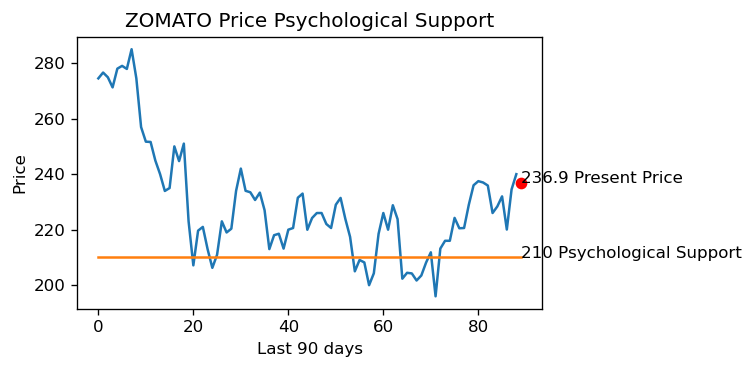

In [1577]:
plt.figure(figsize=(5, 3), dpi=120)
plt.plot(df1.index[:-1],df1['Open'][:-1])
plt.scatter(df1.index[-1],df1['Price'][len(df1['Price'])-1],color='Red')
plt.text(df1.index[-1],df1['Price'][len(df1['Price'])-1],str(xFactor)+' '+'Present Price')
plt.plot(df1.index,pSupport)
plt.text(df1.index[-1],pSupportv[0],str(pSupportv[0])+' '+'Psychological Support')

plt.title("ZOMATO Price Psychological Support")
plt.xlabel("Last 90 days")
plt.ylabel('Price')

plt.show()